# 1. Import Data

In [17]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# Categorical metadata
TRAIN_CAT_PATH = "data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"
train_cat_df = pd.read_excel(TRAIN_CAT_PATH)
train_cat_df.head()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [9]:
train_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [4]:
# fMRI data
TRAIN_FMRI_PATH = "data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_fmri_df = pd.read_csv(TRAIN_FMRI_PATH)
train_fmri_df.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [6]:
# Quantitative metadata
TRAIN_QUANT_PATH = "data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
train_quant_df = pd.read_excel(TRAIN_QUANT_PATH)
train_quant_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [15]:
train_quant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [14]:
# Solutions
TRAIN_SOLUTIONS_PATH = "data/TRAIN/TRAINING_SOLUTIONS.xlsx"
train_solutions_df = pd.read_excel(TRAIN_SOLUTIONS_PATH)
train_solutions_df.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


# 2. Exploratory Analyses and Visualizations

This section:
- Checks for significant difference in means (to see whether the variable is useful for consideration)
- Checks for correlations between variables (useful for feature selection)

Notes based on research:
- Mental Health is measured using Strengths and Difficulties questionnaire (SDQ): https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0218518
- Color Vision Scores are for red-green deficiency, which is not associated with ADHD. Blue-yellow deficiency is associated with ADHD because the blue-yellow retina cones are dopaminergic: https://pmc.ncbi.nlm.nih.gov/articles/PMC3938738/
- Handedness is associated with ADHD (Edinburgh Handedness Questionnaire): https://onlinelibrary.wiley.com/doi/full/10.1111/ejn.16162

In [92]:
# Merge solutions and quant metadata
merged_solutions_and_quant_df = pd.merge(train_solutions_df, train_quant_df, on="participant_id")

In [85]:
# Split into ADHD and No ADHD
adhd = merged_solutions_and_quant_df[merged_solutions_and_quant_df["ADHD_Outcome"] == 1]
no_adhd = merged_solutions_and_quant_df[merged_solutions_and_quant_df["ADHD_Outcome"] == 0]

print('Sample Size (ADHD):', adhd.shape[0])
print('Sample Size (No ADHD):', no_adhd.shape[0])

Sample Size (ADHD): 831
Sample Size (No ADHD): 382


In [77]:
# Helper function for comparison bar graph
def comparison_bar_graph(groups, labels, y_label, title):
    x = range(len(groups))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()

    rects = []

    for i in range(len(groups)):
        group = groups[i]
        rects.append(
            ax.bar(
                [p + (width * i) for p in range(len(group["data"]))],
                group["data"],
                width,
                label=group["label"],
            )
        )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks([p + width / 2 for p in range(len(labels))])
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

    # Attach a text label above each bar in rects1 and rects2, displaying its height.
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(
                "{}".format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center",
                va="bottom",
            )

    for rect in rects:
        autolabel(rect)

    fig.tight_layout()
    plt.show()

## Strengths and Difficulties Questionnaire

The questionnaire is assumed to be self-completed. The scoring is as follows:

| Component                                       | Close to average | Slightly raised | High  | Very High |
| ----------------------------------------------- | ---------------- | --------------- | ----- | --------- |
| Total difficulties score                        | 0-14             | 15-17           | 18-19 | 20-40     |
| Emotional problems score                        | 0-4              | 5               | 6     | 7-10      |
| Conduct problems score                          | 0-3              | 4               | 5     | 6-10      |
| Hyperactivity score                             | 0-5              | 6               | 7     | 8-10      |
| Peer problems score                             | 0-2              | 3               | 4     | 5-10      |
| Prosocial score (higher score, lower prosocial) | 7-10             | 6               | 5     | 0-4       |
| Impact score                                    | 0                | 1               | 2     | 3-10      |


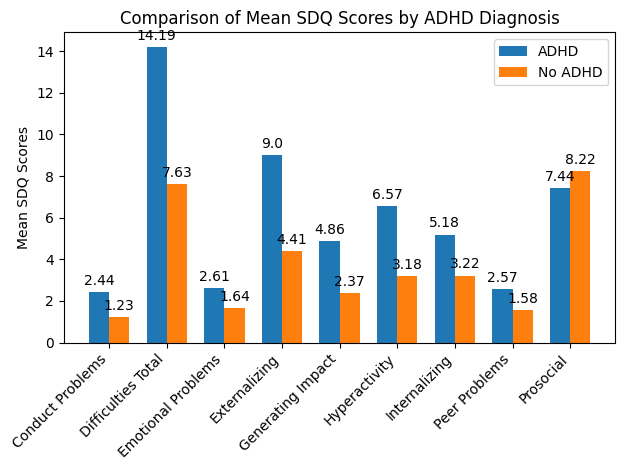

In [81]:
# Compare mean SDQ scores across factors and ADHD Diagnosis
adhd_sdq = adhd.iloc[:, 11:20]
no_adhd_sdq = no_adhd.iloc[:, 11:20]
adhd_means = adhd_sdq.mean()
no_adhd_means = no_adhd_sdq.mean()

labels = adhd_sdq.columns

comparison_bar_graph(
    [
        {
            "data": adhd_means,
            "label": "ADHD",
        },
        {
            "data": no_adhd_means,
            "label": "No ADHD",
        },
    ],
    [
        "Conduct Problems",
        "Difficulties Total",
        "Emotional Problems",
        "Externalizing",
        "Generating Impact",
        "Hyperactivity",
        "Internalizing",
        "Peer Problems",
        "Prosocial",
    ],
    "Mean SDQ Scores",
    "Comparison of Mean SDQ Scores by ADHD Diagnosis",
)

In [91]:
# Are the differences in means statistically significant? Let's check
columns = [
    "SDQ_SDQ_Conduct_Problems",
    "SDQ_SDQ_Difficulties_Total",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Generating_Impact",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Internalizing",
    "SDQ_SDQ_Peer_Problems",
    "SDQ_SDQ_Prosocial",
]

for column in columns:
    t_stat, p_value = stats.ttest_ind(
        adhd_sdq[column], no_adhd_sdq[column], 
        equal_var=False # Welch's T-test since variances are not equal
    )

    print(f"{column}")
    print("--------------------")
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

SDQ_SDQ_Conduct_Problems
--------------------
T-statistic: 11.3775923296331, P-value: 2.5817145951180013e-28

SDQ_SDQ_Difficulties_Total
--------------------
T-statistic: 19.125173560042597, P-value: 6.201872525071455e-68

SDQ_SDQ_Emotional_Problems
--------------------
T-statistic: 7.879847896076415, P-value: 9.75628030331739e-15

SDQ_SDQ_Externalizing
--------------------
T-statistic: 21.820798507152237, P-value: 6.399614754158219e-84

SDQ_SDQ_Generating_Impact
--------------------
T-statistic: 16.006413957090466, P-value: 4.472750906965745e-50

SDQ_SDQ_Hyperactivity
--------------------
T-statistic: 23.064973036410244, P-value: 9.439935394439968e-89

SDQ_SDQ_Internalizing
--------------------
T-statistic: 9.815588728756957, P-value: 1.3381527099438941e-21

SDQ_SDQ_Peer_Problems
--------------------
T-statistic: 8.399080984249467, P-value: 1.8338080364471062e-16

SDQ_SDQ_Prosocial
--------------------
T-statistic: -6.033398092346947, P-value: 2.472741218604665e-09



## Color Deficiency

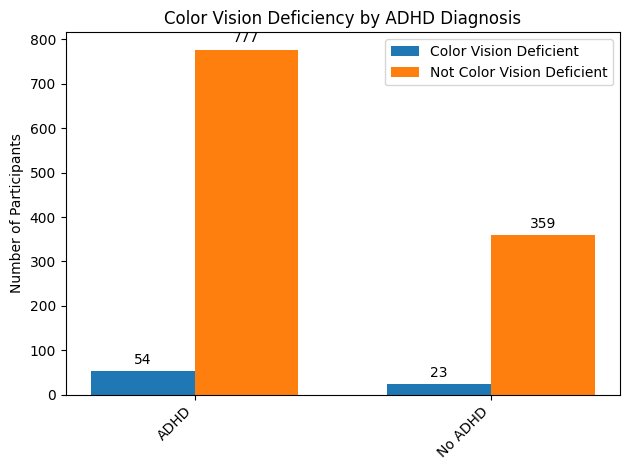

In [80]:
# Count the number of color deficient cases in each group
adhd_color_def = adhd[adhd["ColorVision_CV_Score"] < 12].shape[0]
no_adhd_color_def = no_adhd[no_adhd["ColorVision_CV_Score"] < 12].shape[0]
adhd_no_color_def = adhd[adhd["ColorVision_CV_Score"] >= 12].shape[0]
no_adhd_no_color_def = no_adhd[no_adhd["ColorVision_CV_Score"] >= 12].shape[0]

# Create the bar plot
labels = ["ADHD", "No ADHD"]
color_def_count = [adhd_color_def, no_adhd_color_def]
no_color_def = [adhd_no_color_def, no_adhd_no_color_def]

comparison_bar_graph(
    [
        {
            "data": color_def_count,
            "label": "Color Vision Deficient",
        },
        {
            "data": no_color_def,
            "label": "Not Color Vision Deficient",
        },
    ],
    labels,
    "Number of Participants",
    "Color Vision Deficiency by ADHD Diagnosis",
)

# Edinburgh Handedness Questionnaire

Range of values:

- -100 = 10th left
- −28 ≤ LI < 48 = middle
- 100 = 10th right


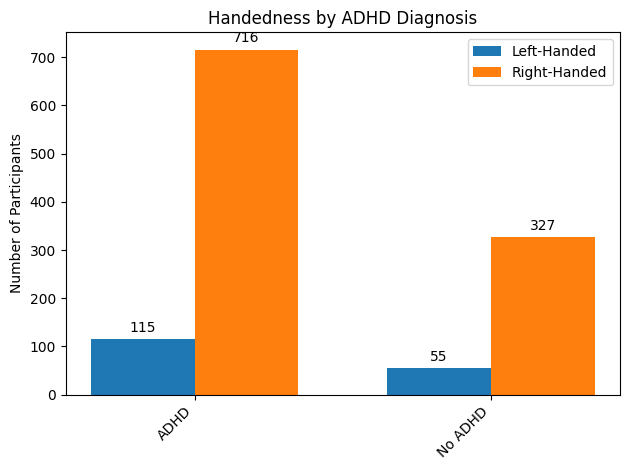

In [94]:
# Count the number of left-handed and right-handed people in each group
adhd_left_handed = adhd[adhd["EHQ_EHQ_Total"] <= 0].shape[0]
adhd_right_handed = adhd[adhd["EHQ_EHQ_Total"] > 0].shape[0]
no_adhd_left_handed = no_adhd[no_adhd["EHQ_EHQ_Total"] <= 0].shape[0]
no_adhd_right_handed = no_adhd[no_adhd["EHQ_EHQ_Total"] > 0].shape[0]

# Create the bar plot
labels = ["ADHD", "No ADHD"]
left_handed_count = [adhd_left_handed, no_adhd_left_handed]
right_handed_count = [adhd_right_handed, no_adhd_right_handed]

comparison_bar_graph(
    [
        {
            "data": left_handed_count,
            "label": "Left-Handed",
        },
        {
            "data": right_handed_count,
            "label": "Right-Handed",
        },
    ],
    labels,
    "Number of Participants",
    "Handedness by ADHD Diagnosis",
)

# 3. Dimensionality Reduction

Reduced to 1101 principal components


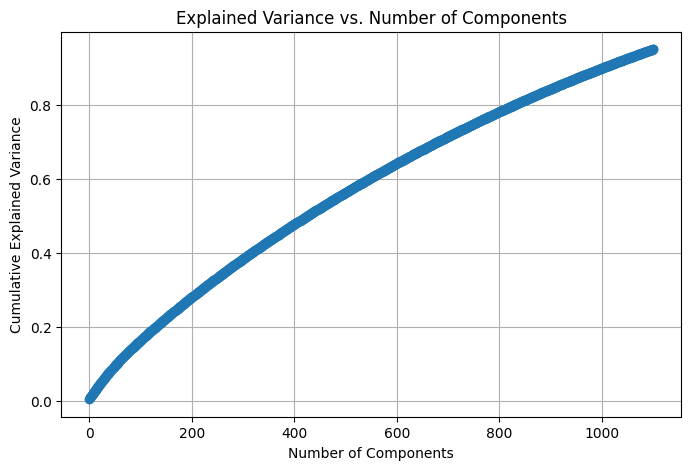

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract feature names (excluding the participant ID column)
feature_names = train_fmri_df.columns[1:]  # First column is participant ID

# Extract activation data (excluding participant ID)
X = train_fmri_df.iloc[:, 1:].values  # Shape (n_samples, 19900)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)  # Shape: (n_samples, reduced_dim)

# Print number of components selected
print(f"Reduced to {X_pca.shape[1]} principal components")

# Plot explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()